## Chacpter2

本章中，你会假装作为被一家地产公司刚刚雇佣的数据科学家，完整地学习一个案例项目。下面是主要步骤：

    项目概述。
    获取数据。
    发现并可视化数据，发现规律。
    为机器学习算法准备数据。
    选择模型，进行训练。
    微调模型。
    给出解决方案。
    部署、监控、维护系统。


In [9]:
import os
import tarfile
from six.moves import urllib

In [38]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH +"/housing.tgz"

In [45]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, 'housing.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [11]:
os.path.join(HOUSING_URL, 'houidng.tgz')

'https://raw.githubusercontent.com/ageron/handson-ml/masterdatasets/housing/housing.tgz\\houidng.tgz'

In [39]:
housing_url=HOUSING_URL
housing_path=HOUSING_PATH
tgz_path = os.path.join(housing_path, "housing.tgz")

In [40]:
urllib.request.urlretrieve(housing_url, tgz_path)

('datasets/housing\\housing.tgz', <http.client.HTTPMessage at 0x1f83f1f4588>)

In [41]:
housing_tgz = tarfile.open(tgz_path)
housing_tgz.extractall(path=housing_path)
housing_tgz.close()

In [44]:
help(urllib.request.urlretrieve)

Help on function urlretrieve in module urllib.request:

urlretrieve(url, filename=None, reporthook=None, data=None)
    Retrieve a URL into a temporary location on disk.
    
    Requires a URL argument. If a filename is passed, it is used as
    the temporary file location. The reporthook argument should be
    a callable that accepts a block number, a read size, and the
    total file size of the URL target. The data argument should be
    valid URL encoded data.
    
    If a filename is passed and the URL points to a local resource,
    the result is a copy from local file to new file.
    
    Returns a tuple containing the path to the newly created
    data file as well as the resulting HTTPMessage object.



In [46]:
fetch_housing_data()
# 现在，当你调用fetch_housing_data()，就会在工作空间创建一个datasets/housing目录，
# 下载housing.tgz文件，解压出housing.csv。

In [47]:
import pandas as pd

In [48]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [50]:
housing = load_housing_data()

In [51]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


每一行都表示一个街区。共有 10 个属性（截图中可以看到 6 个）：经度、维度、房屋年龄中位数、总房间数、总卧室数、人口数、家庭数、收入中位数、房屋价值中位数、离大海距离。

In [53]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


所有的属性都是数值的，除了离大海距离这项。它的类型是对象，因此可以包含任意 Python 对象，但是因为该项是从 CSV 文件加载的，所以必然是文本类型。

In [60]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [64]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [68]:
%matplotlib inline

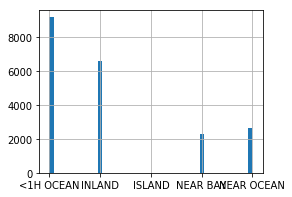

In [82]:
housing["ocean_proximity"].hist(bins=50, figsize=(4, 3))

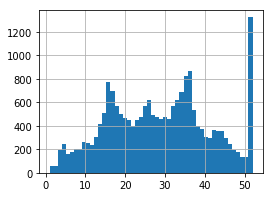

In [83]:
housing["housing_median_age"].hist(bins=50, figsize=(4, 3))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F8444E8978>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F845AE3EB8>]], dtype=object)

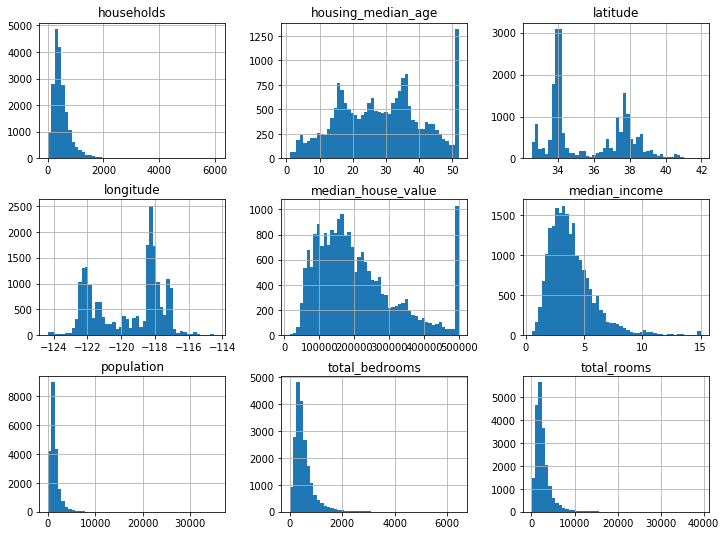

In [86]:
housing.hist(bins=50, figsize=(12, 9))

### 创建测试集

我们用了大量时间来生成测试集的原因是：测试集通常被忽略，但实际是机器学习非常重要的一部分。还有，生成测试集过程中的许多思路对于后面的交叉验证讨论是非常有帮助的。

In [182]:
import hashlib
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [253]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [254]:
print(len(train_set))
print(len(test_set))

13209
3303


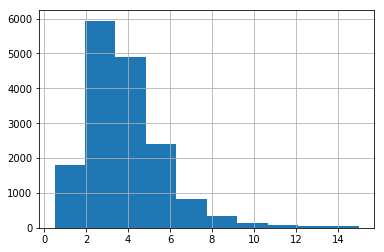

In [255]:
housing['median_income'].hist()

In [256]:
housing['income_cat'] = np.ceil(housing['median_income']/1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

In [257]:
housing['income_cat']

17606    2.0
18632    5.0
14650    2.0
3230     2.0
3555     3.0
19480    3.0
8879     5.0
13685    4.0
4937     2.0
4861     1.0
16365    2.0
19684    2.0
19234    5.0
13956    2.0
2390     3.0
11176    3.0
15614    3.0
2953     2.0
13209    3.0
6569     3.0
5825     3.0
18086    5.0
16718    2.0
13600    3.0
13989    2.0
15168    2.0
6747     4.0
7398     2.0
5562     2.0
16121    3.0
        ... 
12380    3.0
5618     2.0
10060    3.0
18067    5.0
4471     2.0
19786    2.0
9969     3.0
14621    2.0
579      4.0
11682    3.0
245      2.0
12130    3.0
16441    3.0
11016    5.0
19934    2.0
1364     2.0
1236     2.0
5364     4.0
11703    5.0
10356    5.0
15270    4.0
3754     2.0
12166    3.0
6003     5.0
7364     2.0
6563     4.0
12053    2.0
13908    3.0
11159    3.0
15775    3.0
Name: income_cat, Length: 16512, dtype: float64

In [146]:
from sklearn.model_selection import StratifiedShuffleSplit

In [249]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [261]:
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[train_index]

In [154]:
housing['income_cat'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [262]:
for set in (strat_train_set, strat_test_set):
    set.drop(['income_cat'], axis=1, inplace=True)

In [156]:
housing = start_test_set.copy()

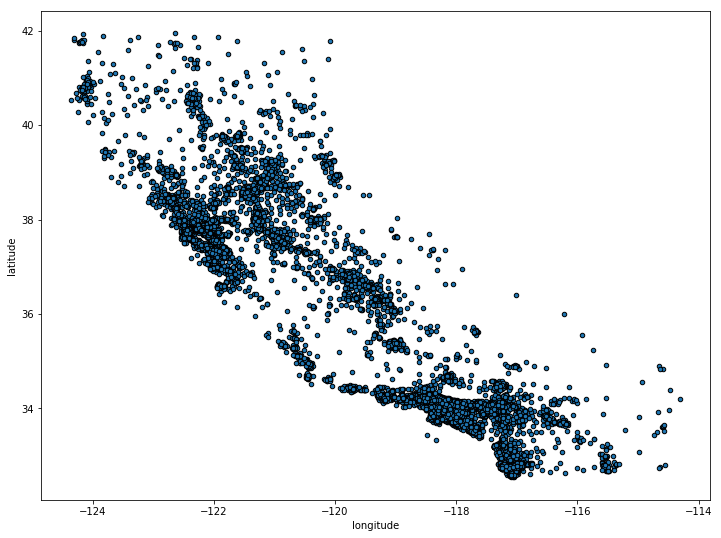

In [198]:
housing.plot(kind='scatter', x='longitude', y='latitude', figsize=(12,9), edgecolors='k')

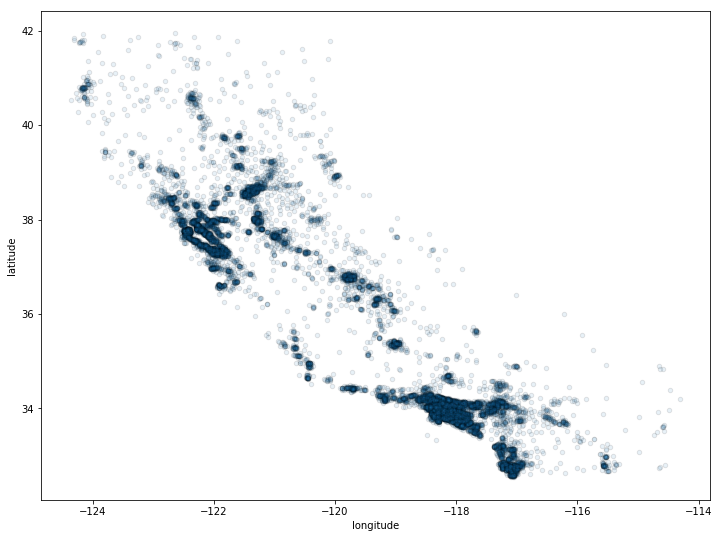

In [199]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1, figsize=(12,9), edgecolors='k')

每个圈的半径表示街区的人口（选项s），颜色代表价格（选项c）。我们用预先定义的名为jet的颜色图（选项cmap），它的范围是从蓝色（低价）到红色（高价）

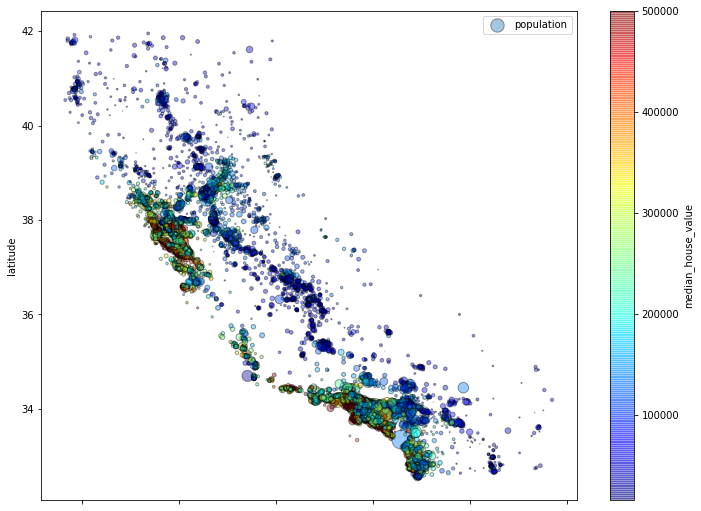

In [201]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, figsize=(12, 9), edgecolors='k',
            s=housing['population']/100, label='population',
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)

In [202]:
corr_matrix = housing.corr()

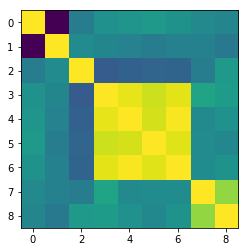

In [205]:
plt.imshow(corr_matrix)

In [216]:
corr_matrix['median_income'].sort_values(ascending=False)

median_income         1.000000
median_house_value    0.687160
total_rooms           0.200087
households            0.010781
population            0.002380
total_bedrooms       -0.009740
longitude            -0.019583
latitude             -0.075205
housing_median_age   -0.111360
Name: median_income, dtype: float64

In [223]:
from pandas.plotting import scatter_matrix

In [226]:
attributes = ['median_house_value', 'median_income', 'housing_median_age']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F84C038390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001F852E25390>]], dtype=object)

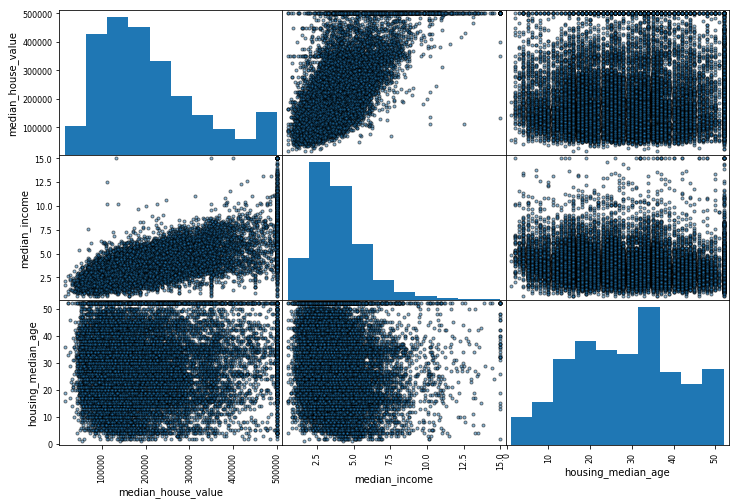

In [232]:
scatter_matrix(housing[attributes], figsize=(12, 8), edgecolors='k')

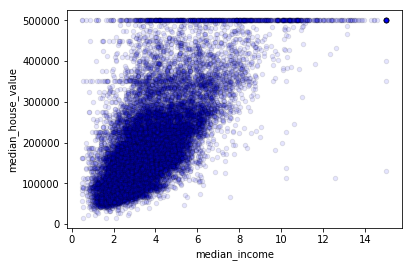

In [239]:
housing.plot(kind='scatter', x='median_income', y='median_house_value',
             alpha=0.1, edgecolors='k', color='b')

In [266]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [267]:
corr_matrix = housing.corr()

In [268]:
corr_matrix['median_income'].sort_values(ascending=False)

median_income               1.000000
median_house_value          0.665871
rooms_per_household         0.277198
total_rooms                 0.208151
longitude                   0.045243
households                  0.017828
population                 -0.001106
total_bedrooms             -0.002030
population_per_household   -0.002286
latitude                   -0.110497
housing_median_age         -0.123223
bedrooms_per_room          -0.622629
Name: median_income, dtype: float64

In [270]:
housing = strat_train_set.drop('median_house_value', axis=1)

In [274]:
housing_labels = strat_train_set['median_house_value'].copy()

In [279]:
housing_labels.values

array([ 216800.,  221500.,      nan, ...,  123400.,  226400.,  217200.])

In [283]:
len(housing)

13209

In [284]:
housing.dropna(subset=['total_bedrooms']).head()
# 去掉对应的街区

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12620,-121.53,38.50,17.0,3087.0,477.0,1365.0,495.0,6.4667,INLAND,6.236364,0.154519,2.757576
10381,-117.63,33.63,6.0,3068.0,549.0,985.0,536.0,4.2009,<1H OCEAN,5.723881,0.178944,1.837687
1401,-122.07,37.95,39.0,2199.0,388.0,1025.0,385.0,4.5893,NEAR BAY,5.711688,0.176444,2.662338
8035,-118.14,33.84,45.0,1908.0,361.0,890.0,342.0,4.5750,<1H OCEAN,5.578947,0.189203,2.602339
7484,-118.21,33.93,41.0,619.0,138.0,636.0,145.0,2.5083,<1H OCEAN,4.268966,0.222940,4.386207


In [289]:
housing.dropna(subset=['total_bedrooms']).shape

(10466, 12)

In [290]:
housing.drop('total_bedrooms', axis=1).shape
# 去掉整个属性

(13209, 11)

In [297]:
median = housing['total_bedrooms'].median()
mean = housing['total_bedrooms'].mean()
housing['total_bedrooms'].fillna(mean).head()

12620    477.000000
3778     540.599178
7850     540.599178
10381    549.000000
1401     388.000000
Name: total_bedrooms, dtype: float64